Connected to base (Python 3.9.19)

In [1]:
import numpy as np, h5py, scipy, matplotlib.pyplot as plt, sys, pandas as pd
import pickle, seaborn as sns, random
import matplotlib as mpl
from scipy.stats import pearsonr
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams["xtick.major.size"] = 8
mpl.rcParams["ytick.major.size"] = 8
import matplotlib.pyplot as plt
plt.rc('font', size=16)          # controls default text sizes
plt.rcParams["font.family"] = "Arial"
sys.path.append(r'C:\Users\Han\Documents\MATLAB\han-lab') ## custom to your clone
# import condition df
conddf = pd.read_csv(r"Z:\condition_df\conddf_neural_com_inference.csv", index_col=None)
savedst = r'C:\Users\Han\Box\neuro_phd_stuff\han_2023-\figure_data\vip_inhibition'

# Definitions and setups
mice = ["e216"]#, "e217", "e218"]
dys_s = [[48], [14, 26, 27], [35, 38, 41, 44, 47, 50]]
opto_ep_s = [[2], [2, 3, 3], [3, 2, 3, 2, 3, 2]]
cells_to_plot_s = [[2231], [16,6,9], 
        [[453,63,26,38], [301, 17, 13, 320], [17, 23, 36, 10], 
        [6, 114, 11, 24], [49, 47, 6, 37], [434,19,77,5]]]
# Processing loop

In [2]:
m=0

In [3]:
mouse_name=mice[m]

In [4]:
days = dys_s[m]
cells_to_plot = cells_to_plot_s[m]
opto_ep = opto_ep_s[m]
dyind = 0

In [5]:
day=48

In [6]:
day = conddf.days.values[ii]
plane=0 #TODO: make modular  
params_pth = rf"Y:\analysis\fmats\{animal}\days\{animal}_day{day:03d}_plane{plane}_Fall.mat"
# fall = scipy.io.loadmat(params_pth, variable_names=['changeRewLoc', 'tuning_curves_pc_early_trials',
#     'tuning_curves_pc_late_trials', 'coms_pc_late_trials', 'coms_pc_early_trials'])
fall = scipy.io.loadmat(params_pth, variable_names=['changeRewLoc', 'dFF', 'tuning_curves_early_trials',
    'tuning_curves_late_trials', 'coms', 'coms_early_trials', 'trialnum', 'rewards',
    'ybinned', 'forwardvel', 'timedFF', 'VR', 'iscell', 'Fc3'])  
dFF = fall['dFF']      
changeRewLoc = np.hstack(fall['changeRewLoc']); trialnum = fall['trialnum'][0]; rewards = fall['rewards'][0]
VR = fall['VR'][0][0][()]
scalingf = VR['scalingFACTOR'][0][0]
rewsize = VR['settings']['rewardZone'][0][0][0][0]/scalingf
ybinned = fall['ybinned'][0]/scalingf; timedFF = fall['timedFF'][0]
forwardvel = fall['forwardvel'][0]
eptest = conddf.optoep.values[ii]
eps = np.where(changeRewLoc>0)[0]
rewlocs = changeRewLoc[eps]/scalingf
eps = np.append(eps, len(changeRewLoc))    
# exclude last ep if too little trials
lastrials = np.unique(trialnum[eps[(len(eps)-2)]:eps[(len(eps)-1)]])[-1]
if lastrials<8:
    eps = eps[:-1]
tcs_early = fall['tuning_curves_early_trials'][0]
tcs_late = fall['tuning_curves_late_trials'][0]
# coms_early = fall['coms_pc_early_trials'][0]
coms = fall['coms'][0]
coms_early = fall['coms_early_trials'][0]    
# just 1 cell for now
vipcell = dFF[:,cells_to_plot[0]]
# cell-cell correlation
corr_per_cell = {}
for celln in range(dFF.shape[1]):
    # exlude no iscell and nans
    if (fall['iscell'][celln,0]==1) and (sum(np.isnan(dFF[:, celln]))==0):
        r,pval = pearsonr(dFF[:,celln], vipcell)
        corr_per_cell[celln] = r
r_per_cell = np.array([v for k,v in corr_per_cell.items()])
iind = np.array([k for k,v in corr_per_cell.items()])

NameError: name 'ii' is not defined

In [7]:
plane=0 #TODO: make modular  
params_pth = rf"Y:\analysis\fmats\{animal}\days\{animal}_day{day:03d}_plane{plane}_Fall.mat"
# fall = scipy.io.loadmat(params_pth, variable_names=['changeRewLoc', 'tuning_curves_pc_early_trials',
#     'tuning_curves_pc_late_trials', 'coms_pc_late_trials', 'coms_pc_early_trials'])
fall = scipy.io.loadmat(params_pth, variable_names=['changeRewLoc', 'dFF', 'tuning_curves_early_trials',
    'tuning_curves_late_trials', 'coms', 'coms_early_trials', 'trialnum', 'rewards',
    'ybinned', 'forwardvel', 'timedFF', 'VR', 'iscell', 'Fc3'])  
dFF = fall['dFF']      
changeRewLoc = np.hstack(fall['changeRewLoc']); trialnum = fall['trialnum'][0]; rewards = fall['rewards'][0]
VR = fall['VR'][0][0][()]
scalingf = VR['scalingFACTOR'][0][0]
rewsize = VR['settings']['rewardZone'][0][0][0][0]/scalingf
ybinned = fall['ybinned'][0]/scalingf; timedFF = fall['timedFF'][0]
forwardvel = fall['forwardvel'][0]
eptest = conddf.optoep.values[ii]
eps = np.where(changeRewLoc>0)[0]
rewlocs = changeRewLoc[eps]/scalingf
eps = np.append(eps, len(changeRewLoc))    
# exclude last ep if too little trials
lastrials = np.unique(trialnum[eps[(len(eps)-2)]:eps[(len(eps)-1)]])[-1]
if lastrials<8:
    eps = eps[:-1]
tcs_early = fall['tuning_curves_early_trials'][0]
tcs_late = fall['tuning_curves_late_trials'][0]
# coms_early = fall['coms_pc_early_trials'][0]
coms = fall['coms'][0]
coms_early = fall['coms_early_trials'][0]    
# just 1 cell for now
vipcell = dFF[:,cells_to_plot[0]]
# cell-cell correlation
corr_per_cell = {}
for celln in range(dFF.shape[1]):
    # exlude no iscell and nans
    if (fall['iscell'][celln,0]==1) and (sum(np.isnan(dFF[:, celln]))==0):
        r,pval = pearsonr(dFF[:,celln], vipcell)
        corr_per_cell[celln] = r
r_per_cell = np.array([v for k,v in corr_per_cell.items()])
iind = np.array([k for k,v in corr_per_cell.items()])

NameError: name 'animal' is not defined

In [8]:
params_pth = rf"Y:\analysis\fmats\{animal}\days\{mouse_name}_day{day:03d}_plane{plane}_Fall.mat"
# fall = scipy.io.loadmat(params_pth, variable_names=['changeRewLoc', 'tuning_curves_pc_early_trials',
#     'tuning_curves_pc_late_trials', 'coms_pc_late_trials', 'coms_pc_early_trials'])
fall = scipy.io.loadmat(params_pth, variable_names=['changeRewLoc', 'dFF', 'tuning_curves_early_trials',
    'tuning_curves_late_trials', 'coms', 'coms_early_trials', 'trialnum', 'rewards',
    'ybinned', 'forwardvel', 'timedFF', 'VR', 'iscell', 'Fc3'])  
dFF = fall['dFF']      
changeRewLoc = np.hstack(fall['changeRewLoc']); trialnum = fall['trialnum'][0]; rewards = fall['rewards'][0]
VR = fall['VR'][0][0][()]
scalingf = VR['scalingFACTOR'][0][0]
rewsize = VR['settings']['rewardZone'][0][0][0][0]/scalingf
ybinned = fall['ybinned'][0]/scalingf; timedFF = fall['timedFF'][0]
forwardvel = fall['forwardvel'][0]
eptest = conddf.optoep.values[ii]
eps = np.where(changeRewLoc>0)[0]
rewlocs = changeRewLoc[eps]/scalingf
eps = np.append(eps, len(changeRewLoc))    
# exclude last ep if too little trials
lastrials = np.unique(trialnum[eps[(len(eps)-2)]:eps[(len(eps)-1)]])[-1]
if lastrials<8:
    eps = eps[:-1]
tcs_early = fall['tuning_curves_early_trials'][0]
tcs_late = fall['tuning_curves_late_trials'][0]
# coms_early = fall['coms_pc_early_trials'][0]
coms = fall['coms'][0]
coms_early = fall['coms_early_trials'][0]    
# just 1 cell for now
vipcell = dFF[:,cells_to_plot[0]]
# cell-cell correlation
corr_per_cell = {}
for celln in range(dFF.shape[1]):
    # exlude no iscell and nans
    if (fall['iscell'][celln,0]==1) and (sum(np.isnan(dFF[:, celln]))==0):
        r,pval = pearsonr(dFF[:,celln], vipcell)
        corr_per_cell[celln] = r
r_per_cell = np.array([v for k,v in corr_per_cell.items()])
iind = np.array([k for k,v in corr_per_cell.items()])

NameError: name 'animal' is not defined

In [9]:
plane=0 #TODO: make modular  
params_pth = rf"Y:\analysis\fmats\{mouse_name}\days\{mouse_name}_day{day:03d}_plane{plane}_Fall.mat"
# fall = scipy.io.loadmat(params_pth, variable_names=['changeRewLoc', 'tuning_curves_pc_early_trials',
#     'tuning_curves_pc_late_trials', 'coms_pc_late_trials', 'coms_pc_early_trials'])
fall = scipy.io.loadmat(params_pth, variable_names=['changeRewLoc', 'dFF', 'tuning_curves_early_trials',
    'tuning_curves_late_trials', 'coms', 'coms_early_trials', 'trialnum', 'rewards',
    'ybinned', 'forwardvel', 'timedFF', 'VR', 'iscell', 'Fc3'])  
dFF = fall['dFF']      
changeRewLoc = np.hstack(fall['changeRewLoc']); trialnum = fall['trialnum'][0]; rewards = fall['rewards'][0]
VR = fall['VR'][0][0][()]
scalingf = VR['scalingFACTOR'][0][0]
rewsize = VR['settings']['rewardZone'][0][0][0][0]/scalingf
ybinned = fall['ybinned'][0]/scalingf; timedFF = fall['timedFF'][0]
forwardvel = fall['forwardvel'][0]
eptest = conddf.optoep.values[ii]
eps = np.where(changeRewLoc>0)[0]
rewlocs = changeRewLoc[eps]/scalingf
eps = np.append(eps, len(changeRewLoc))    
# exclude last ep if too little trials
lastrials = np.unique(trialnum[eps[(len(eps)-2)]:eps[(len(eps)-1)]])[-1]
if lastrials<8:
    eps = eps[:-1]
tcs_early = fall['tuning_curves_early_trials'][0]
tcs_late = fall['tuning_curves_late_trials'][0]
# coms_early = fall['coms_pc_early_trials'][0]
coms = fall['coms'][0]
coms_early = fall['coms_early_trials'][0]    
# just 1 cell for now
vipcell = dFF[:,cells_to_plot[0]]
# cell-cell correlation
corr_per_cell = {}
for celln in range(dFF.shape[1]):
    # exlude no iscell and nans
    if (fall['iscell'][celln,0]==1) and (sum(np.isnan(dFF[:, celln]))==0):
        r,pval = pearsonr(dFF[:,celln], vipcell)
        corr_per_cell[celln] = r
r_per_cell = np.array([v for k,v in corr_per_cell.items()])
iind = np.array([k for k,v in corr_per_cell.items()])

NameError: name 'ii' is not defined

In [10]:
opto_ep

[2]

In [11]:
i==0

NameError: name 'i' is not defined

In [12]:
ii=0

In [13]:
ybinned = fall['ybinned'][0]/scalingf; timedFF = fall['timedFF'][0]
forwardvel = fall['forwardvel'][0]
eptest = opto_ep[ii]
eps = np.where(changeRewLoc>0)[0]
rewlocs = changeRewLoc[eps]/scalingf
eps = np.append(eps, len(changeRewLoc))

In [14]:
lastrials = np.unique(trialnum[eps[(len(eps)-2)]:eps[(len(eps)-1)]])[-1]
if lastrials<8:
    eps = eps[:-1]
tcs_early = fall['tuning_curves_early_trials'][0]
tcs_late = fall['tuning_curves_late_trials'][0]
# coms_early = fall['coms_pc_early_trials'][0]
coms = fall['coms'][0]
coms_early = fall['coms_early_trials'][0]

In [15]:
vipcell = dFF[:,cells_to_plot[0]]
# cell-cell correlation
corr_per_cell = {}
for celln in range(dFF.shape[1]):
    # exlude no iscell and nans
    if (fall['iscell'][celln,0]==1) and (sum(np.isnan(dFF[:, celln]))==0):
        r,pval = pearsonr(dFF[:,celln], vipcell)
        corr_per_cell[celln] = r
r_per_cell = np.array([v for k,v in corr_per_cell.items()])
iind = np.array([k for k,v in corr_per_cell.items()])

(array([  1.,   9.,  87., 445., 841., 446., 163.,  42.,  10.,   2.]),
 array([-0.30481841, -0.23926156, -0.17370472, -0.10814787, -0.04259103,
         0.02296582,  0.08852266,  0.15407951,  0.21963635,  0.2851932 ,
         0.35075004]),
 <BarContainer object of 10 artists>)

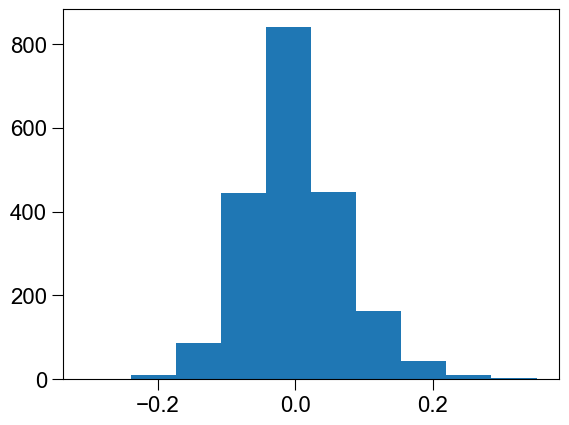

In [16]:
plt.hist(r_per_cell)

In [17]:
iind[r_per_cell>.2]

array([   0,    7,    9,  135,  290,  366,  584,  659,  775, 1083, 1099,
       1296, 1442, 1607, 1696, 2358, 2415])

In [18]:
dFF[:,iind[r_per_cell>.2]]

array([[0.23808633, 0.32638466, 0.26199797, ..., 0.2909604 , 0.26133677,
        0.30035609],
       [0.42334199, 0.47965887, 0.15962194, ..., 0.36957774, 0.27987769,
        0.29682049],
       [0.31043237, 0.26609218, 0.20690793, ..., 0.4076741 , 0.23807359,
        0.30580938],
       ...,
       [0.07606941, 0.25450408, 0.12445362, ..., 0.1299579 , 0.07168239,
        0.01931478],
       [0.15252033, 0.23492225, 0.1383643 , ..., 0.35915485, 0.06105875,
        0.07606672],
       [0.06416024, 0.25929597, 0.09944673, ..., 0.37083396, 0.1590191 ,
        0.18600281]])

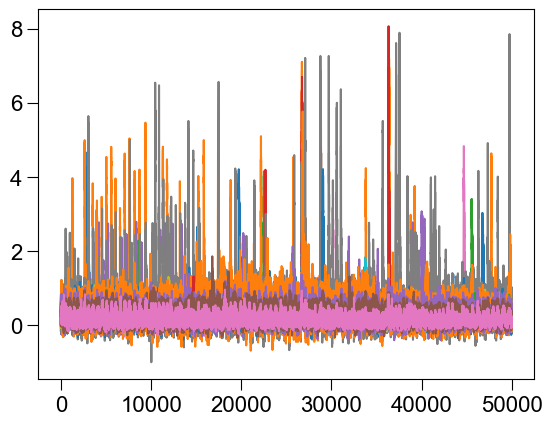

In [19]:
plt.plot(dFF[:,iind[r_per_cell>.2]])

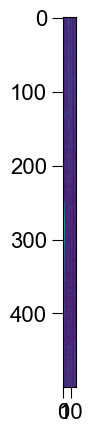

In [20]:
plt.imshow(dFF[1000:1500,iind[r_per_cell>.2]])

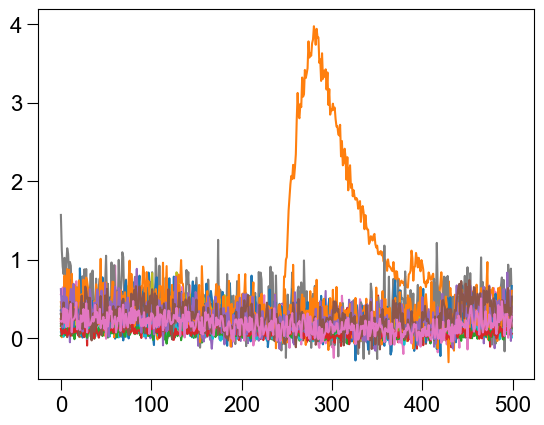

In [21]:
plt.plot(dFF[1000:1500,iind[r_per_cell>.2]])

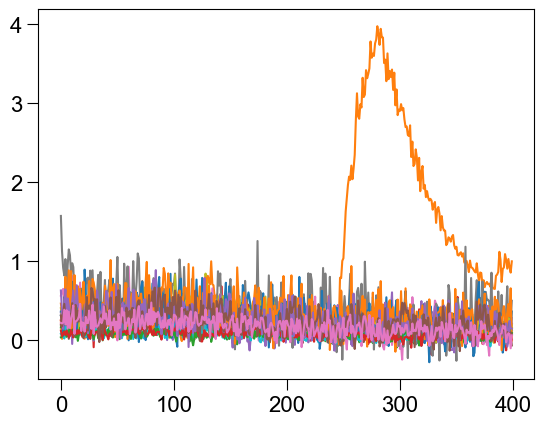

In [22]:
plt.plot(dFF[1000:1400,iind[r_per_cell>.2]])

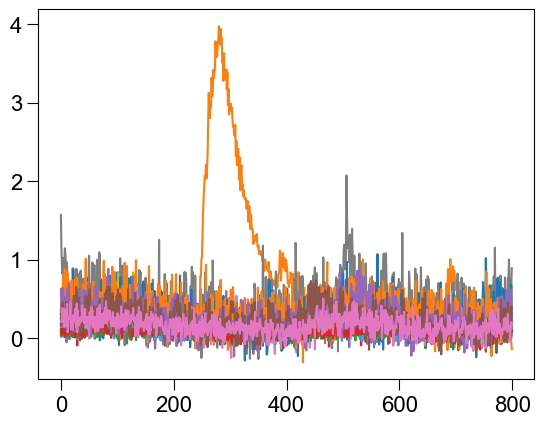

In [23]:
plt.plot(dFF[1000:1800,iind[r_per_cell>.2]])

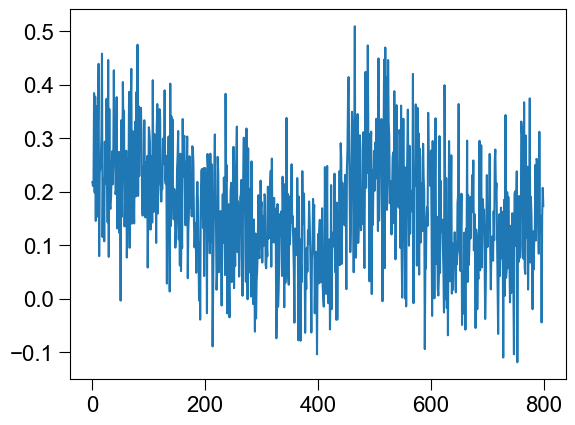

In [24]:
plt.plot(dFF[1000:1800,iind[r_per_cell>.3]])

AttributeError: module 'matplotlib.pyplot' has no attribute 'plo'

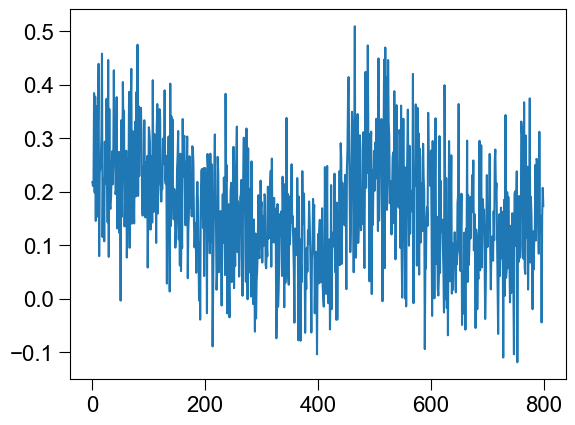

In [25]:
rng = np.arange(1000,1800)
plt.plot(dFF[rng,iind[r_per_cell>.3]])
plt.plo(vipcell[rng])

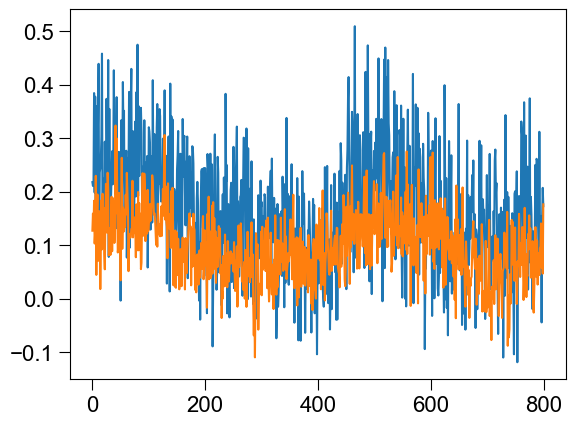

In [26]:
rng = np.arange(1000,1800)
plt.plot(dFF[rng,iind[r_per_cell>.3]])
plt.plot(vipcell[rng])

In [27]:
rng = np.arange(1000,1800)
plt.plot(dFF[rng,iind[r_per_cell<.3]])
plt.plot(vipcell[rng])

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (800,) (2045,) 

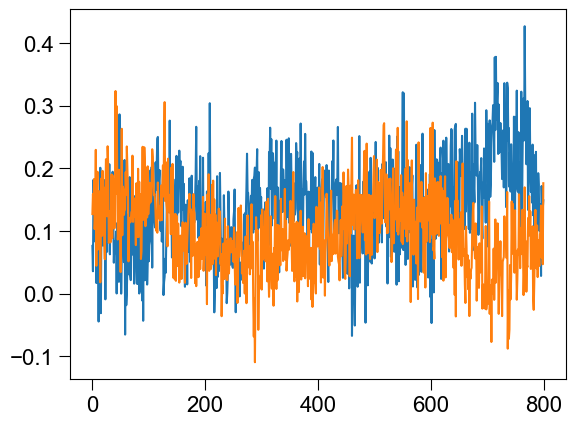

In [28]:
rng = np.arange(1000,1800)
plt.plot(dFF[rng,iind[r_per_cell<-.3]])
plt.plot(vipcell[rng])

In [29]:
rng = np.arange(1000,1800)
plt.plot(dFF[rng,iind[r_per_cell>.2]])
plt.plot(vipcell[rng])

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (800,) (17,) 

NameError: name 'axes' is not defined

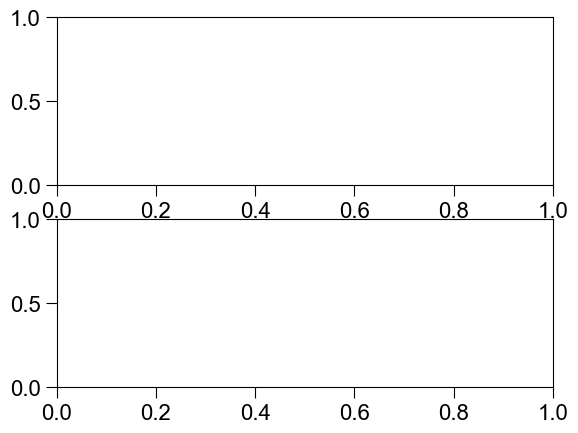

In [30]:
rng = np.arange(1000,1800)
fig, ax = plt.subplots(nrows=2,ncols=1)
axes[0].plot(dFF[rng,iind[r_per_cell>.2]])
axes[1].plot(vipcell[rng])

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (800,) (17,) 

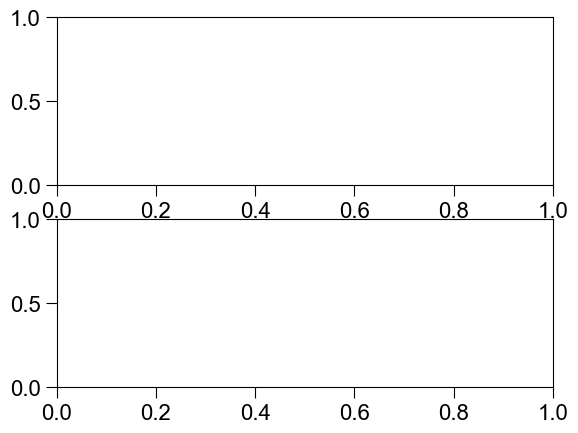

In [31]:
rng = np.arange(1000,1800)
fig, axes = plt.subplots(nrows=2,ncols=1)
axes[0].plot(dFF[rng,iind[r_per_cell>.2]])
axes[1].plot(vipcell[rng])

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (800,) (170,) 

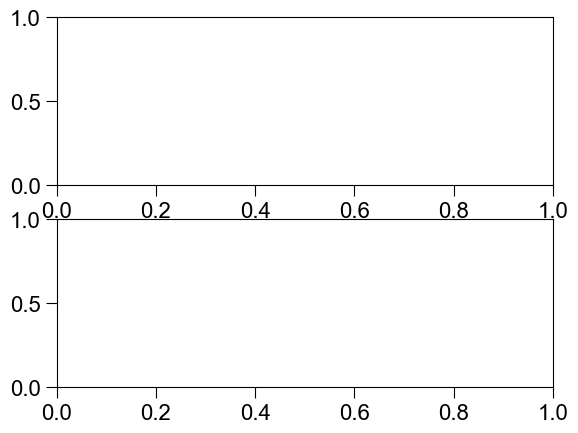

In [32]:
rng = np.arange(1000,1800)
fig, axes = plt.subplots(nrows=2,ncols=1)
axes[0].plot(dFF[rng,iind[r_per_cell>.1]])
axes[1].plot(vipcell[rng])

In [33]:
rng

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098,
       1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109,
       1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120,
       1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131,
       1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142,
       1143, 1144, 1145, 1146, 1147, 1148, 1149, 11

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (170,) (800,) 

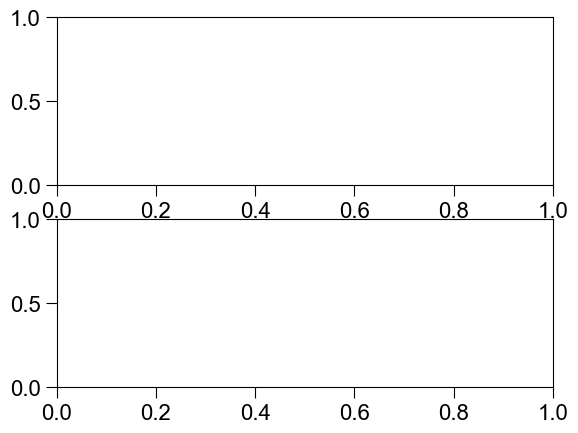

In [34]:
rng = np.arange(1000,1800)
fig, axes = plt.subplots(nrows=2,ncols=1)
axes[0].plot(dFF[iind[r_per_cell>.1],rng])
axes[1].plot(vipcell[rng])

In [35]:
dFF.shape

(50000, 2657)

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (170,) (800,) 

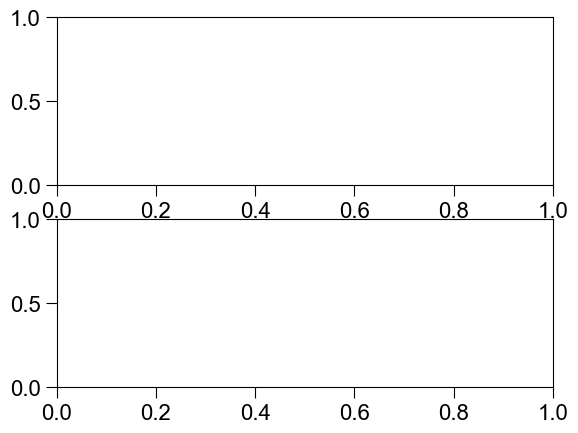

In [36]:
rng = np.arange(1000,1800)
fig, axes = plt.subplots(nrows=2,ncols=1)
axes[0].plot(dFF[iind[r_per_cell>.1],rng])
axes[1].plot(vipcell[rng])